<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [3]:
# Read CSV
house_csv = pd.read_csv("/Users/winifredwetthasinghe/Documents/Data_Science_Course_UTS/Labs/DATA/Sacramento_transactions.csv")
house_csv

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


In [31]:
house_csv.isna().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [4]:
# ANSWER
#The target variable is the price. This is the test data set for house prices that we are using to predict.

#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [5]:
# ANSWER
# beds,baths,sq_ft,city,state or latitude and longitude. 

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [6]:
# ANSWER
house_csv.corr()
#What is the closet to value 1.00000 is considered the best predictor which is the number of bathrooms.
#But the sq_ft makes more sense. So choosing sq_ft as the best predictor.

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [7]:
from sklearn.linear_model import LinearRegression

##### 2.4.1 Fit predictor and target variables using linear regression 

In [8]:
# ANSWER
X = house_csv[['sq__ft']]
Y = house_csv['price']

##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [9]:
# ANSWER
from sklearn.metrics import r2_score
r2 = r2_score(X, Y)
print('r2 score for perfect model is', r2)

r2 score for perfect model is -100771.96107484534


### 3. Splitting Data

In [10]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [11]:
# ANSWER
## Create training and testing subsets
import numpy as np
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
X_train,X_test, Y_train, Y_test

(     sq__ft
 433    1758
 172    1643
 125    2354
 541       0
 879    1354
 ..      ...
 106    1284
 270    2056
 860    3579
 435     950
 102    1380
 
 [659 rows x 1 columns],
      sq__ft
 613     906
 451    2382
 731    1962
 436    1739
 275    1527
 ..      ...
 697    1040
 797    1888
 328    3984
 525    2085
 971    1040
 
 [326 rows x 1 columns],
 433    217500
 172     99000
 125    335750
 541    488750
 879    104000
         ...  
 106    280908
 270    275000
 860    610000
 435    220000
 102    265000
 Name: price, Length: 659, dtype: int64,
 613     77000
 451    236000
 731    240971
 436    221000
 275    293993
         ...  
 697    205000
 797    325000
 328    572500
 525    408431
 971    224000
 Name: price, Length: 326, dtype: int64)

#### 3.2 Check Shape, Sample of Test Train Data

In [13]:
# ANSWER
## Check training/test data
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((659, 1), (326, 1), (659,), (326,))

#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [32]:
# ANSWER
# Splitting the data into training and testing data

In [33]:
regr = LinearRegression() 

In [15]:
regr.fit(X_train, Y_train)

LinearRegression()

In [16]:
# ANSWER
# r2 = r2_score(X_test, Y_test)
# print('r2 score for perfect model is', r2)
print(regr.score(X_test, Y_test))

0.13602012247180006


### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [17]:
# ANSWER
y_pred = regr.predict(X_test)

In [18]:
regr.predict([[1204]])

array([223594.18266381])

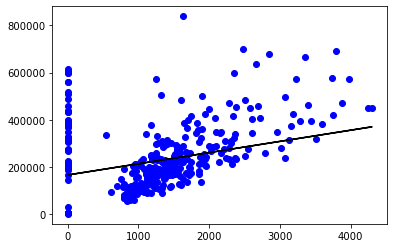

In [19]:
plt.scatter(X_test, Y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

In [22]:
#Finding the true house value

y=Xβ+c+ϵ (1)

x-data
β-coefficient
c-intercept
ϵ-error

In [21]:
regr.coef_

array([47.43508406])

In [23]:
regr.intercept_

166482.34144968854

In [ ]:
𝑦̂ =𝛽0+𝛽1𝑥 (2)

In [25]:
#Using equation 2
regr.intercept_ + regr.coef_*1204
#This is similar to what acquired by y_pred

array([223594.18266381])

#### Find the error

In [28]:
#Using equation 1
error=223594.18266381-(regr.coef_*1204)-regr.intercept_ 
error

array([2.24099495e-09])



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



